## PROBLEM 1

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading dataset
bk=pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
bk.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
#Datatype of variables
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
#Shape of dataset
bk.shape

(210, 7)

In [6]:
#Null value verification
bk.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [7]:
#Skewness of data
bk.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

In [8]:
#Mean of variables
bk.mean()

spending                        14.847524
advance_payments                14.559286
probability_of_full_payment      0.870999
current_balance                  5.628533
credit_limit                     3.258605
min_payment_amt                  3.700201
max_spent_in_single_shopping     5.408071
dtype: float64

In [9]:
#Median of variables
bk.median()

spending                        14.35500
advance_payments                14.32000
probability_of_full_payment      0.87345
current_balance                  5.52350
credit_limit                     3.23700
min_payment_amt                  3.59900
max_spent_in_single_shopping     5.22300
dtype: float64

In [10]:
#Standard Deviation
bk.std()

spending                        2.909699
advance_payments                1.305959
probability_of_full_payment     0.023629
current_balance                 0.443063
credit_limit                    0.377714
min_payment_amt                 1.503557
max_spent_in_single_shopping    0.491480
dtype: float64

In [11]:
#Descriptive statistics
bk.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [12]:
#Duplicate records
dups = bk.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
bk[dups]

Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


(array([32., 34., 22., 28., 22., 16., 10., 26., 13.,  7.]),
 array([10.59 , 11.649, 12.708, 13.767, 14.826, 15.885, 16.944, 18.003,
        19.062, 20.121, 21.18 ]),
 <a list of 10 Patch objects>)

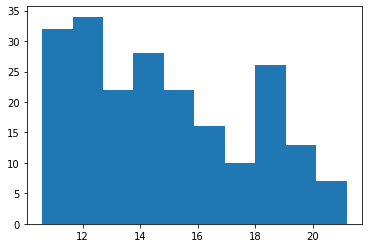

In [13]:
#Univariate analysis
plt.hist(bk['spending'])

(array([14., 32., 38., 21., 23., 18., 13., 21., 20., 10.]),
 array([12.41 , 12.894, 13.378, 13.862, 14.346, 14.83 , 15.314, 15.798,
        16.282, 16.766, 17.25 ]),
 <a list of 10 Patch objects>)

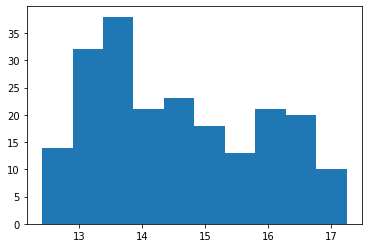

In [14]:
plt.hist(bk['advance_payments'])

(array([ 6.,  9., 10., 17., 27., 37., 41., 29., 27.,  7.]),
 array([0.8081 , 0.81912, 0.83014, 0.84116, 0.85218, 0.8632 , 0.87422,
        0.88524, 0.89626, 0.90728, 0.9183 ]),
 <a list of 10 Patch objects>)

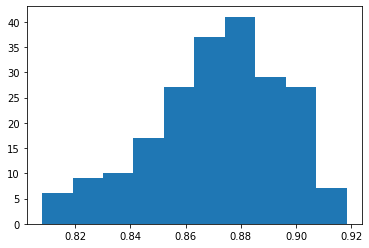

In [15]:
plt.hist(bk['probability_of_full_payment'])

(array([11., 41., 40., 25., 21., 16., 19., 20.,  9.,  8.]),
 array([4.899 , 5.0766, 5.2542, 5.4318, 5.6094, 5.787 , 5.9646, 6.1422,
        6.3198, 6.4974, 6.675 ]),
 <a list of 10 Patch objects>)

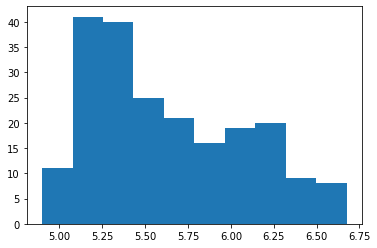

In [16]:
plt.hist(bk['current_balance'])

(array([23., 26., 23., 25., 22., 26., 20., 13., 25.,  7.]),
 array([2.63  , 2.7703, 2.9106, 3.0509, 3.1912, 3.3315, 3.4718, 3.6121,
        3.7524, 3.8927, 4.033 ]),
 <a list of 10 Patch objects>)

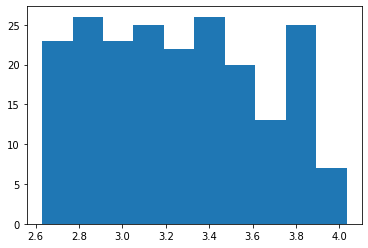

In [17]:
plt.hist(bk['credit_limit'])

(array([14., 33., 31., 38., 35., 31., 16.,  7.,  3.,  2.]),
 array([0.7651 , 1.53419, 2.30328, 3.07237, 3.84146, 4.61055, 5.37964,
        6.14873, 6.91782, 7.68691, 8.456  ]),
 <a list of 10 Patch objects>)

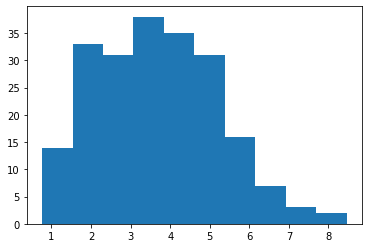

In [18]:
plt.hist(bk['min_payment_amt'])

(array([ 6., 19., 48., 51., 17.,  3., 25., 17., 17.,  7.]),
 array([4.519 , 4.7221, 4.9252, 5.1283, 5.3314, 5.5345, 5.7376, 5.9407,
        6.1438, 6.3469, 6.55  ]),
 <a list of 10 Patch objects>)

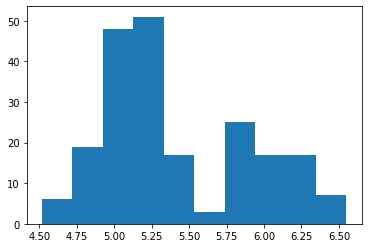

In [19]:
plt.hist(bk['max_spent_in_single_shopping'])

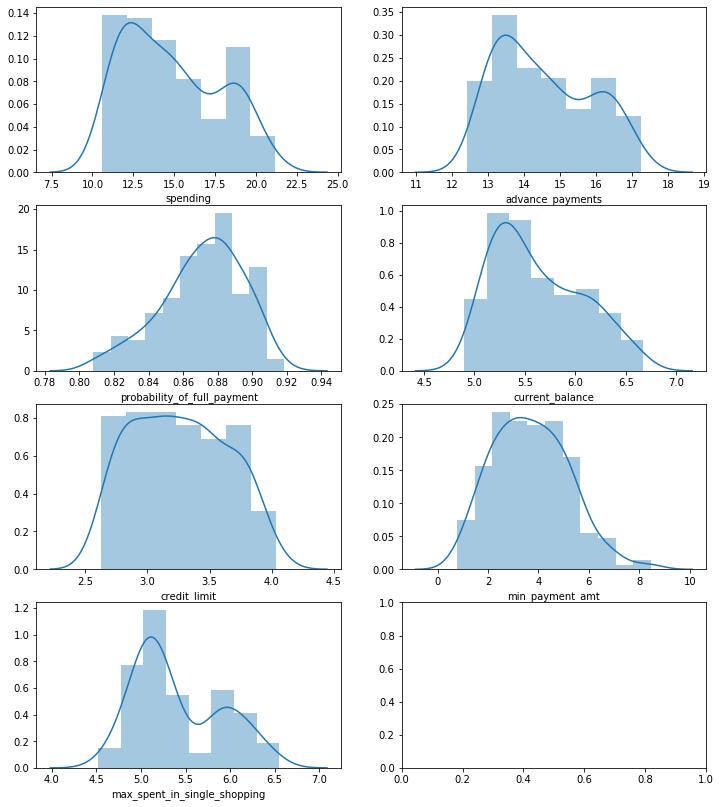

In [20]:
## Univariate - Distribution analysis

fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(bk['spending'] , ax=axes[0][0])
# a.set_title("spending Distribution",fontsize=10)

a = sns.distplot(bk['advance_payments'] , ax=axes[0][1])
# a.set_title("advance_payments Distribution",fontsize=15)

a = sns.distplot(bk['probability_of_full_payment'] , ax=axes[1][0])
# a.set_title("probability_of_full_payment Distribution",fontsize=10)

a = sns.distplot(bk['current_balance'] , ax=axes[1][1])
# a.set_title("current_balance Distribution",fontsize=10)

a = sns.distplot(bk['credit_limit'] , ax=axes[2][0])
# a.set_title("credit_limit Distribution",fontsize=15)

a = sns.distplot(bk['min_payment_amt'] , ax=axes[2][1])
# a.set_title("min_payment_amt Distribution",fontsize=15)

a = sns.distplot(bk['max_spent_in_single_shopping'] , ax=axes[3][0])
# a.set_title("max_spent_in_single_shopping Distribution",fontsize=15)


plt.show()

In [21]:
#Correlation
bk.corr(method='pearson')

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


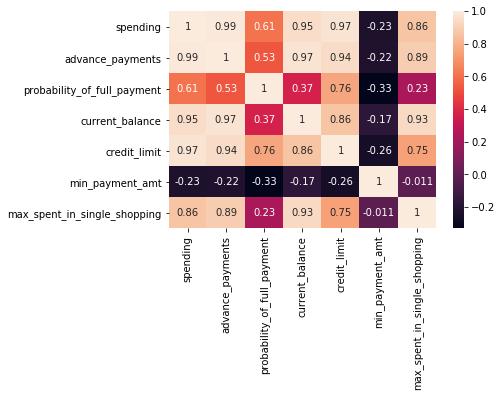

In [22]:
# plt.subplots(figsize=(20,15))
sns.heatmap(bk.corr(), annot=True)  # plot the correlation coefficients as a heatmap

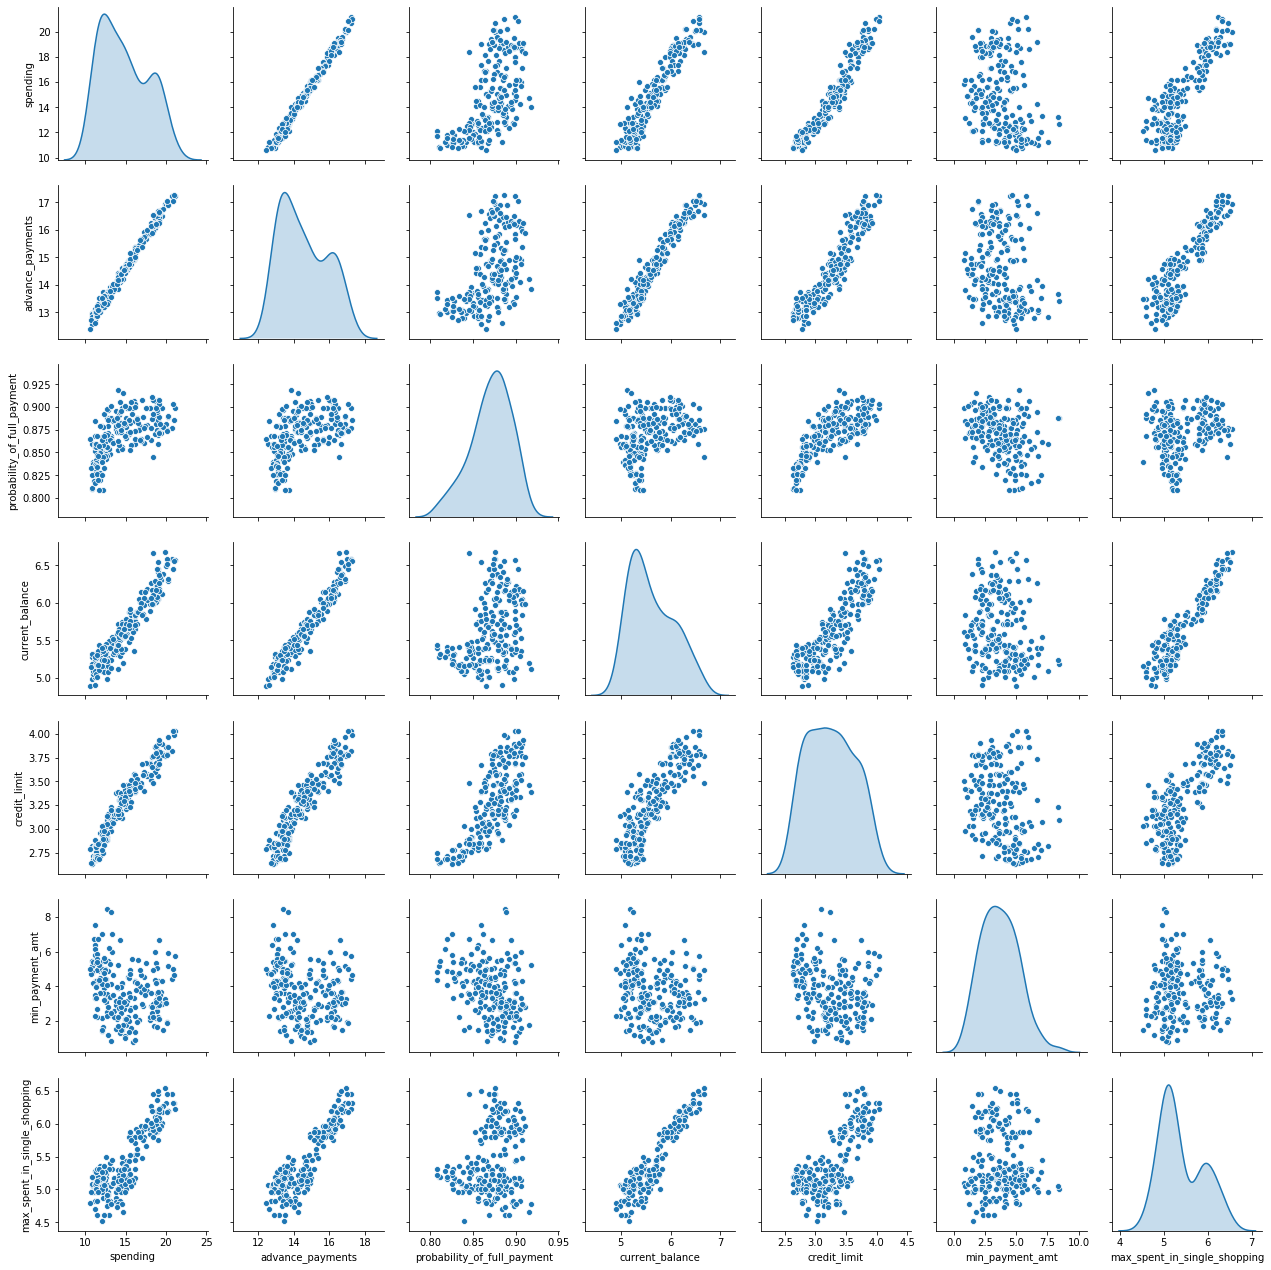

In [23]:
#Multi variate analysis pair plots
sns.pairplot(bk,diag_kind='kde')

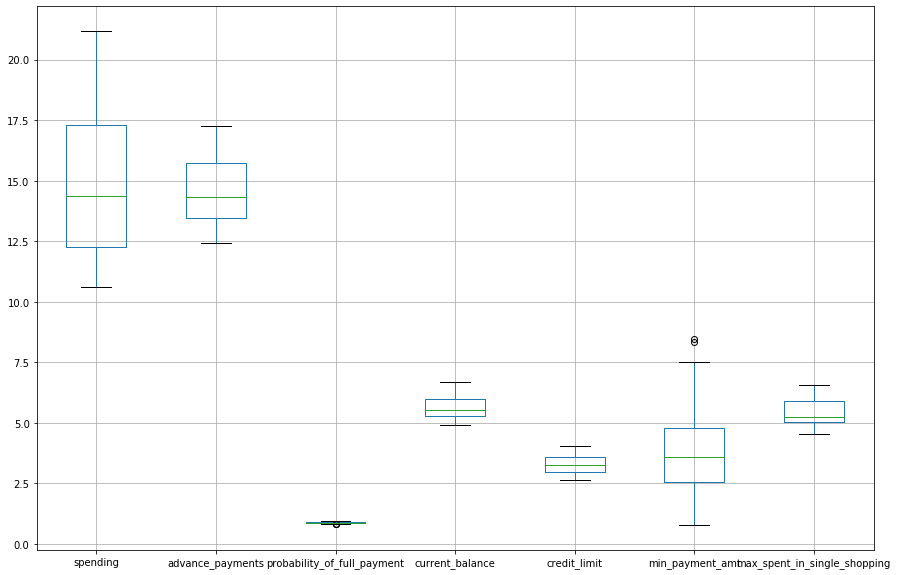

In [24]:
#Box plot before scaling 
#plt.subplots(figsize=(25,30))
bk.boxplot(figsize=(15,10))

In [25]:
#Scaling the data
X = StandardScaler()

In [26]:
scaled_bk = X.fit_transform(bk)
scaled_bk

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [27]:
# All variables must be on same scale, hence we perform scaling.
# Standardization


from scipy.stats import zscore
bk_new=bk.apply(zscore)
bk_new.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


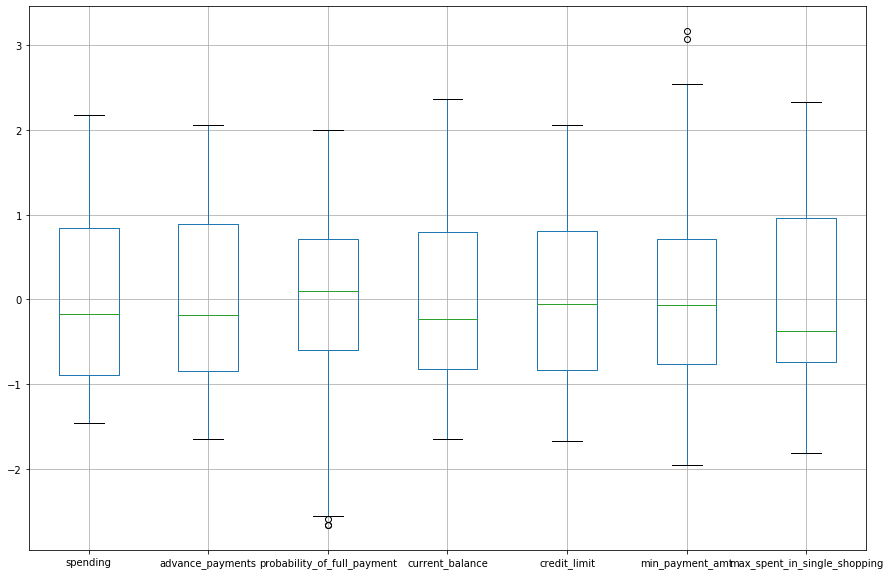

In [28]:
#Box plot after scaling
bk_new.boxplot(figsize=(15,10))

In [29]:
#Hierarchical clustering
link_method = linkage(scaled_bk, method = 'average')

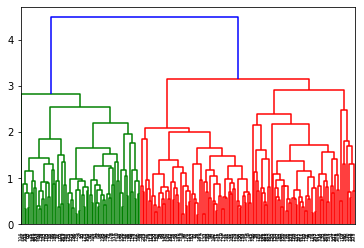

In [30]:
#Overall dendrogram
dend = dendrogram(link_method)

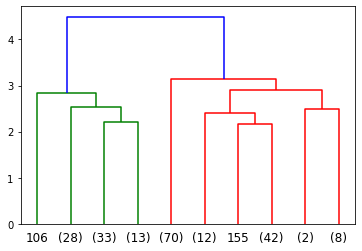

In [31]:
#Truncated dendrogram
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10,
                 )

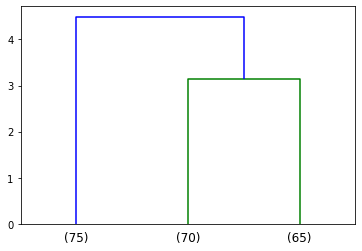

In [32]:
#p=3
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 3,
                 )

In [33]:
# Set criterion as maxclust,considering 3 clusters as optimum and stored the result in another object 'clusters'

clusters = fcluster(link_method, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [34]:
#Appending cluster label along with the dataset
bk_1=bk.copy()
bk['clusters'] = clusters
bk_1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443


In [35]:
#Frequency under each cluster
bk.clusters.value_counts().sort_index()

1    75
2    70
3    65
Name: clusters, dtype: int64

In [36]:
#Cluster profile - Hierarchical clusters
aggdata=bk.groupby('clusters').mean()
aggdata['Freq']=bk.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


In [37]:
#K Means
k_means = KMeans(n_clusters = 3)

In [38]:
#Performing K Means clustering on scaled data
k_means.fit(scaled_bk)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
#Cluster Label of each data
k_means.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [40]:
#WSS when n=3
k_means.inertia_

430.65897315130053

In [41]:
wss=[]

In [42]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_bk)
    wss.append(KM.inertia_)

In [43]:
wss

[1470.0,
 659.1717544870407,
 430.65897315130053,
 371.65314399951626,
 326.36254154106985,
 289.00346825195015,
 262.31061151991236,
 239.2457098530981,
 221.50044551202407,
 207.3940389181752]

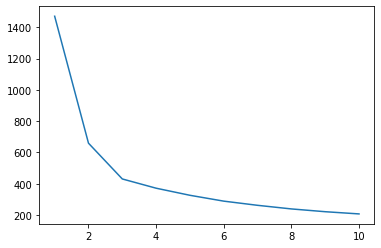

In [44]:
#Elbow curve
plt.plot(range(1,11), wss)

In [45]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_bk)
labels = k_means.labels_

In [46]:
#Cluster label when n=3
bk_2=bk_1.copy()
bk_1["Clus_kmeans"] = labels
bk_1.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2


In [47]:
#Silhouette score when n=3
silhouette_score(scaled_bk,labels)

0.4007270552751299

In [48]:
#Silhouette width when n=3
sil_width = silhouette_samples(scaled_bk,labels)

In [49]:
#Appending Sil width with the dataset
bk_1["sil_width"] = sil_width
bk_1.head(5).T

,0,1,2,3,4
spending,19.940000,15.990000,18.950000,10.830000,17.990000
advance_payments,16.920000,14.890000,16.420000,12.960000,15.860000
probability_of_full_payment,0.875200,0.906400,0.882900,0.809900,0.899200
current_balance,6.675000,5.363000,6.248000,5.278000,5.890000
credit_limit,3.763000,3.582000,3.755000,2.641000,3.694000
min_payment_amt,3.252000,3.336000,3.368000,5.182000,2.068000
max_spent_in_single_shopping,6.550000,5.144000,6.148000,5.185000,5.837000
Clus_kmeans,2.000000,1.000000,2.000000,0.000000,2.000000
sil_width,0.573699,0.366386,0.637784,0.512458,0.362276


In [50]:
bk_1["Clus_kmeans"] = labels
bk_1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,1,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2,0.362276


In [51]:
#Cluster profile when n=3
clust_profile=bk_1
clust_profile=clust_profile.groupby('Clus_kmeans').mean()
clust_profile['freq']=bk_1.Clus_kmeans.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,freq
Clus_kmeans,,,,,,,,,
0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,0.397473,72
1,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,0.339816,71
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,0.468772,67


In [52]:
#K Means when n=2 since there is inflection at n=2
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_bk)
labels = k_means.labels_

In [53]:
#Cluster Label of each data
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [54]:
#Appending cluster label with the dataset
bk_2["Clus_kmeans"] = labels
bk_2.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [55]:
#Silhouette score when n=2
silhouette_score(scaled_bk,labels)

0.46577247686580914

In [56]:
#Silhouette width when n=2
sil_width = silhouette_samples(scaled_bk,labels)

In [57]:
#Frequency under each cluster
bk_2.Clus_kmeans.value_counts().sort_index()

0    133
1     77
Name: Clus_kmeans, dtype: int64

In [58]:
#Appending Silhouttte width with the dataset
bk_2["sil_width"] = sil_width
bk_2.head(5).T

,0,1,2,3,4
spending,19.940000,15.990000,18.950000,10.830000,17.990000
advance_payments,16.920000,14.890000,16.420000,12.960000,15.860000
probability_of_full_payment,0.875200,0.906400,0.882900,0.809900,0.899200
current_balance,6.675000,5.363000,6.248000,5.278000,5.890000
credit_limit,3.763000,3.582000,3.755000,2.641000,3.694000
min_payment_amt,3.252000,3.336000,3.368000,5.182000,2.068000
max_spent_in_single_shopping,6.550000,5.144000,6.148000,5.185000,5.837000
Clus_kmeans,1.000000,0.000000,1.000000,0.000000,1.000000
sil_width,0.603797,0.008748,0.678038,0.495306,0.548072


In [59]:
#Cluster profile when n=2
clust_profile=bk_2
clust_profile=clust_profile.groupby('Clus_kmeans').mean()
clust_profile['freq']=bk_2.Clus_kmeans.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,freq
Clus_kmeans,,,,,,,,,
0,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737,0.439683,133
1,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,0.510837,77


In [174]:
clust_profile.T

Clus_kmeans,0,1
spending,12.930602,18.158571
advance_payments,13.693459,16.054805
probability_of_full_payment,0.863577,0.883817
current_balance,5.339699,6.127429
credit_limit,3.025917,3.660519
min_payment_amt,3.827444,3.480417
max_spent_in_single_shopping,5.081737,5.971740
sil_width,0.439683,0.510837
freq,133.000000,77.000000


#  PROBLEM 2

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
#Loading the dataset
ins = pd.read_csv("insurance_part2_data.csv")
ins_1=ins.copy()#ANN before treating outliers
ins_2=ins.copy()#ANN after treating outliers

In [3]:
#Checking the data
ins.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
#Datatypes of variables
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [5]:
# Checking for null values
ins.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [6]:
#Summary of the data
ins.describe(include="all")

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [7]:
#Summary of the data
ins.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [8]:
ins.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


In [9]:
#Getting unique counts of all Variables
for column in ins[['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel', 
                   'Duration', 'Sales', 'Product Name', 'Destination']]:
    print(column.upper(),': ',ins[column].nunique())
    print(ins[column].value_counts().sort_values())
    print('\n')

AGE :  70
8       1
14      1
83      1
77      1
84      1
     ... 
35     94
30     96
48    108
31    125
36    999
Name: Age, Length: 70, dtype: int64


AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


COMMISION :  324
126.75       1
12.45        1
46.80        1
21.35        1
17.55        1
          ... 
7.70        57
23.76       61
54.00       61
63.21       62
0.00      1366
Name: Commision, Length: 324, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


DURATION :  257
4580     1
149      1
141      1
215      1
217      1
        ..
11      81
10      81
6       81
5       82
8       83
Name: Duration, Length: 257, dtype: int64


SALES :  380
271.00      1
62.40       1
491.50      1
159.00      1
100.50      1
         ... 
216.00     59
2

## Check for duplicate data

In [10]:
# Check for duplicates
dups = ins.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
ins[dups]
#Not dropping them since the data is not linked to primary key like cusotmer ID to show it as real duplicates

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


## Checking for Outliers

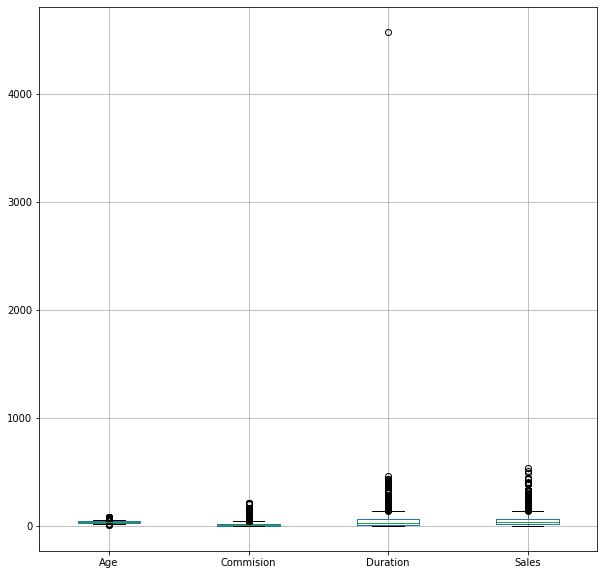

In [11]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
ins.boxplot()

There are outliers in all the variables. CART and Random Forest are robust to outliers. 
Neural Networks can handle outliers if there are more hidden layers and if the number of outliers is lesser. For now, we will keep the data as it is, and if we find the performance of the neural network to be lesser, then we will treat the outliers and re-build neural network model

## Checking pairwise distribution of the continuous variables

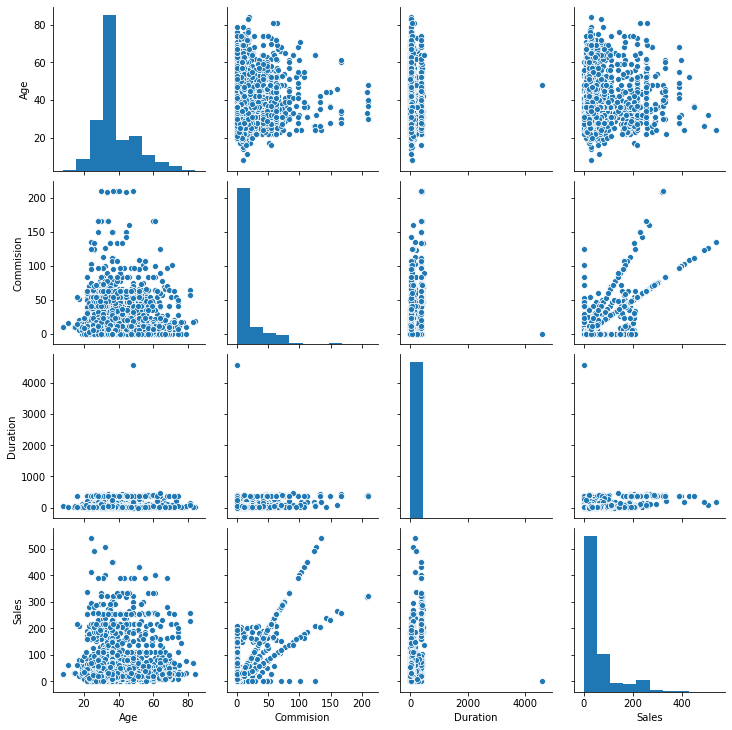

In [12]:
#Multivariate analysis
sns.pairplot(ins)

In [13]:
ins.corr(method='pearson')

,Age,Commision,Duration,Sales
Age,1.000000,0.067717,0.030425,0.039455
Commision,0.067717,1.000000,0.471389,0.766505
Duration,0.030425,0.471389,1.000000,0.558930
Sales,0.039455,0.766505,0.558930,1.000000


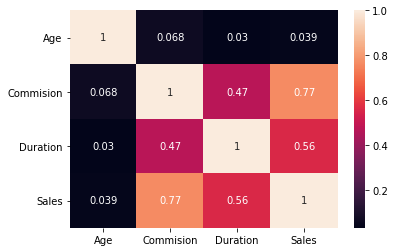

In [14]:
#Correlation heatmap
sns.heatmap(ins.corr(), annot=True)

Though we have only positive correlations between variables the overall the magnitude of correlations between the variables are very less.

## Converting all objects to categorical codes

In [15]:
#Converting all objects to categorical codes
for feature in ins.columns: 
    if ins[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(ins[feature].unique()))
        print(pd.Categorical(ins[feature].unique()).codes)
        ins[feature] = pd.Categorical(ins[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [16]:
ins.corr()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
Age,1.000000,0.021939,-0.048992,-0.030027,0.067717,-0.068927,0.030425,0.039455,0.020643,0.004750
Agency_Code,0.021939,1.000000,0.552247,-0.428647,-0.392585,0.022085,-0.239285,-0.346404,-0.379233,0.092274
Type,-0.048992,0.552247,1.000000,-0.343505,-0.216599,-0.099291,-0.198219,-0.254868,-0.008416,0.317289
Claimed,-0.030027,-0.428647,-0.343505,1.000000,0.297498,-0.016641,0.214923,0.348877,0.257951,-0.023851
Commision,0.067717,-0.392585,-0.216599,0.297498,1.000000,0.033563,0.471389,0.766505,0.399306,0.184017
Channel,-0.068927,0.022085,-0.099291,-0.016641,0.033563,1.000000,-0.019389,0.037418,-0.037859,0.035373
Duration,0.030425,-0.239285,-0.198219,0.214923,0.471389,-0.019389,1.000000,0.558930,0.354763,-0.019665
Sales,0.039455,-0.346404,-0.254868,0.348877,0.766505,0.037418,0.558930,1.000000,0.474634,0.094267
Product Name,0.020643,-0.379233,-0.008416,0.257951,0.399306,-0.037859,0.354763,0.474634,1.000000,0.021528
Destination,0.004750,0.092274,0.317289,-0.023851,0.184017,0.035373,-0.019665,0.094267,0.021528,1.000000


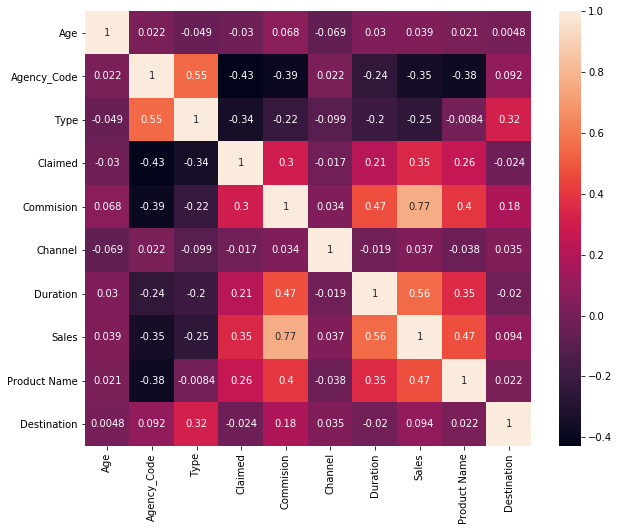

In [20]:
#Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(ins.corr(), annot=True)

In [75]:
#Verifying the datatypes after converting the object variables to categorical codes
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [76]:
ins.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [77]:
#Proportion of 1s and 0s
ins.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

In [78]:
#Extracting the target column into separate vectors for training set and test set
X = ins.drop("Claimed", axis=1)

y = ins.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [79]:
#Splitting data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=0)

In [80]:
#Building a Decision Tree Classifier
param_grid = {
    'criterion': ['gini'],
    'max_depth': [3,5,6,7,10,20,30], #50
    'min_samples_leaf': [2,3,5,10,50,100,150], 
    'min_samples_split': [30,50,100,130,150,200,300,450]
}

dtcl = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 5)

In [81]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 100}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [82]:
#Generating Tree
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

http://webgraphviz.com/

In [83]:
#Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.589248
Sales         0.248406
Product Name  0.083593
Commision     0.041219
Duration      0.036234
Age           0.001301
Type          0.000000
Channel       0.000000
Destination   0.000000


In [84]:
#Predicting on Training and Test dataset
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [85]:
#Getting the Predicted Classes and Probs
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.859649,0.140351
1,0.283582,0.716418
2,0.932836,0.067164
3,0.426471,0.573529
4,0.704663,0.295337


AUC: 0.821


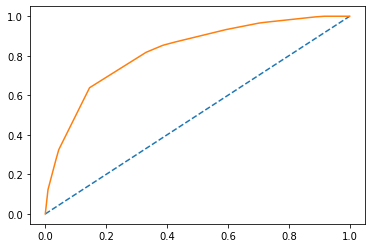

In [86]:
#Model Evaluation
#AUC and ROC for the training data
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.812


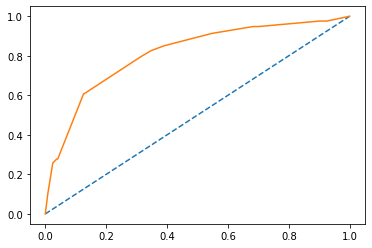

In [87]:
##AUC and ROC for the test data
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

In [88]:
#Confusion Matrix for the training data
confusion_matrix(train_labels, ytrain_predict)

array([[1251,  213],
       [ 230,  406]], dtype=int64)

In [89]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.789047619047619

In [90]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1464
           1       0.66      0.64      0.65       636

    accuracy                           0.79      2100
   macro avg       0.75      0.75      0.75      2100
weighted avg       0.79      0.79      0.79      2100



In [91]:
#CART analysis for train data
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
ins=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(ins.loc["1"][0],2)
cart_train_recall=round(ins.loc["1"][1],2)
cart_train_f1=round(ins.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.66
cart_train_recall  0.64
cart_train_f1  0.65


### Confusion Matrix for test data

In [92]:
confusion_matrix(test_labels, ytest_predict)

array([[534,  78],
       [113, 175]], dtype=int64)

In [93]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7877777777777778

In [94]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       612
           1       0.69      0.61      0.65       288

    accuracy                           0.79       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.78      0.79      0.78       900



In [95]:
#CART analysis for test data
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
ins=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(ins.loc["1"][0],2)
cart_test_recall=round(ins.loc["1"][1],2)
cart_test_f1=round(ins.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.69
cart_test_recall  0.61
cart_test_f1  0.65


# Cart Conclusion

<b>Train Data:</b>  
    AUC: 82.1%        
    Accuracy: 79%
    Sensitivity: 64%     
    Precision: 66%        
    f1-Score: 65%       
            
<b>Test Data:</b>      
    AUC: 81.2%      
    Accuracy:79%      
    Sensitivity: 61%    
    Precision: 69%       
    f1-Score: 65%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  
  
Agency code is the most important variable for predicting claims

# Building a Random Forest Classifier

In [96]:
#Grid Search for finding out the optimal values for the hyper parameters
param_grid = {
    'max_depth': [7,8,10],
    'max_features': [5,6,7],
    'min_samples_leaf': [2,3,5],
    'min_samples_split': [10,20],
    'n_estimators': [100,150]
}

rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [97]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [98]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 150}

In [99]:
best_grid = grid_search.best_estimator_

In [100]:
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Predicting the Training and Testing data

In [101]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## RF Model Performance Evaluation on Training data

In [102]:
confusion_matrix(train_labels,ytrain_predict)

array([[1310,  154],
       [ 236,  400]], dtype=int64)

In [103]:
#Accuracy for train dataset RF
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8142857142857143

In [104]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1464
           1       0.72      0.63      0.67       636

    accuracy                           0.81      2100
   macro avg       0.78      0.76      0.77      2100
weighted avg       0.81      0.81      0.81      2100



In [105]:
#RF Analysis for train data
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
ins=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(ins.loc["1"][0],2)
rf_train_recall=round(ins.loc["1"][1],2)
rf_train_f1=round(ins.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.72
rf_train_recall  0.63
rf_train_f1  0.67


Area under Curve is 0.7618697803897309


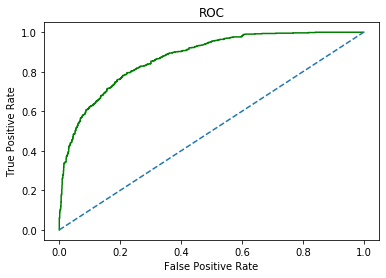

In [106]:
#RF AUC Analysis for train data
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [107]:
confusion_matrix(test_labels,ytest_predict)

array([[553,  59],
       [119, 169]], dtype=int64)

In [108]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.8022222222222222

In [109]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       612
           1       0.74      0.59      0.66       288

    accuracy                           0.80       900
   macro avg       0.78      0.75      0.76       900
weighted avg       0.80      0.80      0.80       900



In [110]:
#RF Analysis for test data
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.74
rf_test_recall  0.59
rf_test_f1  0.66


Area under Curve is 0.7452001633986928


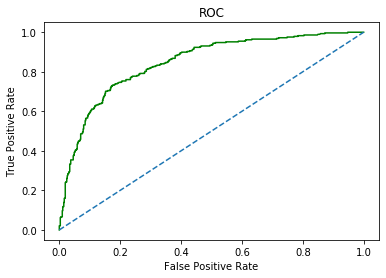

In [111]:
#RF AUC Analysis for test data
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', rf_test_auc)

In [112]:
# Variable Importance RF
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.301362
Product Name  0.201622
Sales         0.195426
Commision     0.106943
Duration      0.095877
Age           0.068680
Type          0.014743
Destination   0.013051
Channel       0.002296


# Random Forest Conclusion

<b>Train Data:</b>  
    AUC: 76%        
    Accuracy: 81%        
    Sensitivity: 63%     
    Precision: 72%        
    f1-Score: 67%       
            
<b>Test Data:</b>      
    AUC: 76%      
    Accuracy: 75%      
    Sensitivity: 59%    
    Precision: 74%       
    f1-Score: 66%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  
  
Agency code is again the most important variable for predicting claims

# Building a Neural Network Classifier

In [113]:
#Outliers not treated
for feature in ins_1.columns: 
    if ins_1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(ins_1[feature].unique()))
        print(pd.Categorical(ins_1[feature].unique()).codes)
        ins_1[feature] = pd.Categorical(ins_1[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [114]:
#Extract x and y
y = ins_1['Claimed']
x = ins_1.drop(['Claimed'], axis=1)

In [115]:
#split data into 70% training and 30% test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state=0)

In [116]:
# Checking dimensions on the train and test data
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (2100, 9)
x_test:  (900, 9)
y_train:  (2100,)
y_test:  (900,)


In [117]:
#Initialize an object for StandardScaler
sc = StandardScaler()

In [118]:
#Scale the training data
x_train = sc.fit_transform(x_train)
x_train

array([[-0.19416819,  0.7047513 ,  0.79799046, ...,  0.09168619,
        -0.53443162,  3.03459053],
       [ 0.18753385,  1.71085446, -1.25314781, ..., -0.00417853,
        -1.32478824,  3.03459053],
       [ 0.85551243, -1.307455  , -1.25314781, ...,  2.62319957,
         1.83663824, -0.43634635],
       ...,
       [-0.48044473,  1.71085446, -1.25314781, ..., -0.53828197,
        -1.32478824, -0.43634635],
       [-0.19416819,  0.7047513 ,  0.79799046, ..., -0.83957109,
        -0.53443162, -0.43634635],
       [-1.33927433,  0.7047513 ,  0.79799046, ..., -0.46980717,
         0.255925  , -0.43634635]])

In [119]:
# Apply the transformation on the test data
x_test = sc.transform(x_test)
x_test

array([[-0.19416819,  0.7047513 ,  0.79799046, ..., -0.48350213,
        -0.53443162, -0.43634635],
       [-0.95757228, -1.307455  , -1.25314781, ...,  0.70111192,
         1.83663824, -0.43634635],
       [ 0.09210834,  1.71085446, -1.25314781, ..., -0.53828197,
        -1.32478824, -0.43634635],
       ...,
       [-0.09874268,  1.71085446, -1.25314781, ..., -0.59306181,
        -1.32478824, -0.43634635],
       [-0.19416819,  0.7047513 ,  0.79799046, ..., -0.45611221,
         0.255925  , -0.43634635],
       [ 1.90519305, -1.307455  , -1.25314781, ..., -0.62045173,
        -1.32478824, -0.43634635]])

In [120]:
# All variables must be on same scale, hence we can omit scaling.
# Standardization


from scipy.stats import zscore
ins_scale=ins_1.apply(zscore)
ins_scale.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.667148,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.667148,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.667148,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.667148,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.667148,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


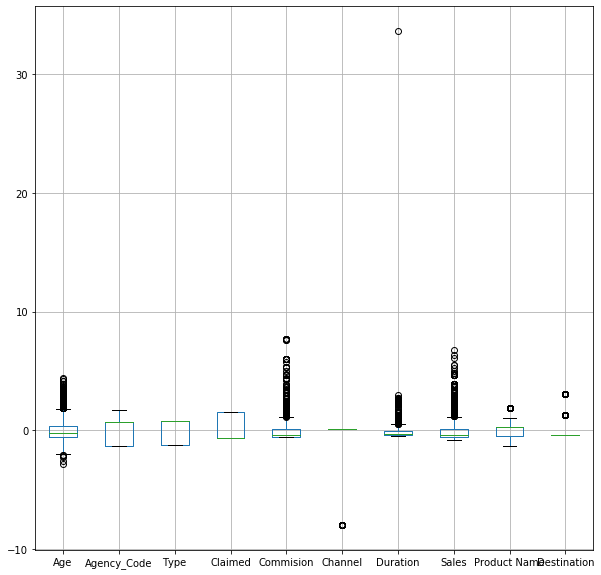

In [121]:
ins_scale.boxplot(figsize=(10,10))

In [122]:
#Building ANN using GridSearchCV
param_grid = {
    'hidden_layer_sizes': [100,200,300,500],
    'max_iter': [5000,2500,7000,6000],
    'solver': ['sgd','adam'],
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=0)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [123]:
grid_search.fit(x_train, y_train)
grid_search.best_params_
#{'hidden_layer_sizes': 100, 'max_iter': 7000, 'solver': 'adam', 'tol': 0.01}

{'hidden_layer_sizes': 300, 'max_iter': 5000, 'solver': 'sgd', 'tol': 0.01}

In [124]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=300, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='sgd', tol=0.01,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [125]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [126]:
confusion_matrix(y_train,ytrain_predict)

array([[1365,   99],
       [ 394,  242]], dtype=int64)

In [127]:
#Accuracy for train data_before treating outlier
nn_train_acc=best_grid.score(x_train,train_labels) 
nn_train_acc

0.7652380952380953

In [128]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1464
           1       0.71      0.38      0.50       636

    accuracy                           0.77      2100
   macro avg       0.74      0.66      0.67      2100
weighted avg       0.76      0.77      0.74      2100



In [129]:
#ANN analysis before treating outliers
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.71
nn_train_recall  0.38
nn_train_f1  0.5


Area under Curve is 0.656440096917208


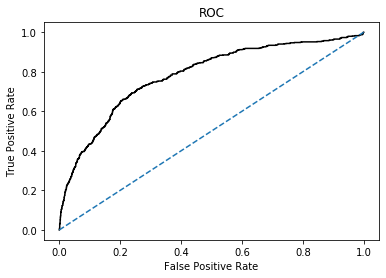

In [130]:
#ANN AUC analysis before treating outliers
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(x_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict(x_train))
print('Area under Curve is', nn_train_auc)

In [131]:
confusion_matrix(y_test,ytest_predict)

array([[581,  31],
       [188, 100]], dtype=int64)

In [132]:
#Accuracy for test data_before treating outlier
nn_test_acc=best_grid.score(x_test,test_labels)
nn_test_acc

0.7566666666666667

In [133]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       612
           1       0.76      0.35      0.48       288

    accuracy                           0.76       900
   macro avg       0.76      0.65      0.66       900
weighted avg       0.76      0.76      0.72       900



In [134]:
#ANN analysis before treating outliers
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.76
nn_test_recall  0.35
nn_test_f1  0.48


Area under Curve is 0.6482843137254902


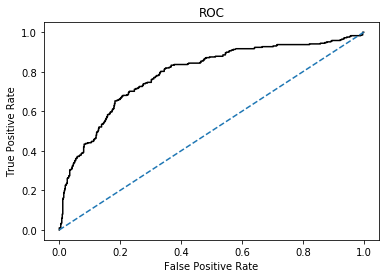

In [135]:
#ANN AUC analysis before treating outliers
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(x_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict(x_test))
print('Area under Curve is', nn_test_auc)

In [136]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=300, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='sgd', tol=0.01,
              validation_fraction=0.1, verbose=False, warm_start=False)>

# Comparison of the performance metrics from the 3 models before treating outliers in ANN

In [137]:
#Performance analysis of all 3 models before treating outliers in ANN
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.79,0.81,0.80,0.77,0.76
AUC,0.82,0.81,0.76,0.75,0.66,0.65
Recall,0.64,0.61,0.63,0.59,0.38,0.35
Precision,0.66,0.69,0.72,0.74,0.71,0.76
F1 Score,0.65,0.65,0.67,0.66,0.50,0.48


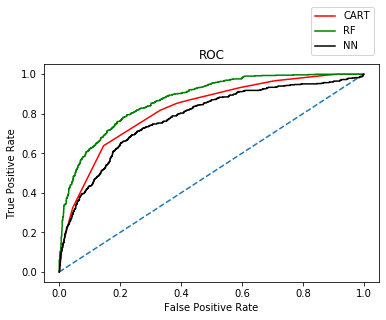

In [138]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

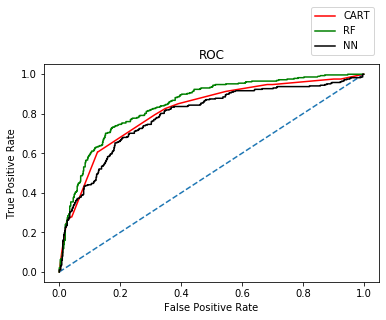

In [139]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [140]:
#NN after treating outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [141]:
lrage,urage=remove_outlier(ins_2['Age'])
ins_2['Age']=np.where(ins_2['Age']>urage,urage,ins_2['Age'])
ins_2['Age']=np.where(ins_2['Age']<lrage,lrage,ins_2['Age'])

lrcomm,urcomm=remove_outlier(ins_2['Commision'])
ins_2['Commision']=np.where(ins_2['Commision']>urcomm,urcomm,ins_2['Commision'])
ins_2['Commision']=np.where(ins_2['Commision']<lrcomm,lrcomm,ins_2['Commision'])

lrdur,urdur=remove_outlier(ins_2['Duration'])
ins_2['Duration']=np.where(ins_2['Duration']>urdur,urdur,ins_2['Duration'])
ins_2['Duration']=np.where(ins_2['Duration']<lrdur,lrdur,ins_2['Duration'])

lrsales,ursales=remove_outlier(ins_2['Sales'])
ins_2['Sales']=np.where(ins_2['Sales']>ursales,ursales,ins_2['Sales'])
ins_2['Sales']=np.where(ins_2['Sales']<lrsales,lrsales,ins_2['Sales'])


In [142]:
#Checking duplicates
dups_2=ins_2.duplicated()
print('Number of duplicate rows = %d' %(dups_2.sum()))
ins_2[dups_2]
#Since the duplicate records are not having any primary ket such as customer ID, it is considered that 
#similar type of plans are sold to various customers. Hence they are not considered as real duplicates

Number of duplicate rows = 286


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30.0,C2B,Airlines,Yes,15.0000,Online,27.0,60.0,Bronze Plan,ASIA
103,32.0,C2B,Airlines,Yes,43.0875,Online,141.0,142.5,Silver Plan,ASIA
113,39.0,C2B,Airlines,Yes,43.0875,Online,141.0,142.5,Silver Plan,ASIA
168,40.0,C2B,Airlines,Yes,43.0875,Online,141.0,142.5,Silver Plan,ASIA
218,51.0,C2B,Airlines,Yes,43.0875,Online,141.0,142.5,Silver Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2962,36.0,EPX,Travel Agency,No,0.0000,Online,4.0,20.0,Customised Plan,ASIA
2981,34.0,C2B,Airlines,Yes,43.0875,Online,141.0,142.5,Silver Plan,ASIA
2984,36.0,EPX,Travel Agency,No,0.0000,Online,1.0,20.0,Customised Plan,ASIA
2991,29.0,C2B,Airlines,Yes,43.0875,Online,141.0,142.5,Silver Plan,ASIA


In [143]:
from sklearn.model_selection import train_test_split

In [144]:
#Converting objects to categorical codes
for feature in ins_2.columns: 
    if ins_2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(ins_2[feature].unique()))
        print(pd.Categorical(ins_2[feature].unique()).codes)
        ins_2[feature] = pd.Categorical(ins_2[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [145]:
#Extract a and b
b = ins_2['Claimed']
a= ins_2.drop(['Claimed'], axis=1)

In [146]:
#split data into 70% training and 30% test data
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size= 0.30, random_state=0)

In [147]:
# Checking dimensions on the train and test data
print('a_train: ',a_train.shape)
print('a_test: ',a_test.shape)
print('b_train: ',b_train.shape)
print('b_test: ',b_test.shape)

a_train:  (2100, 9)
a_test:  (900, 9)
b_train:  (2100,)
b_test:  (900,)


In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
#Initialize an object for StandardScaler
sc1 = StandardScaler()

In [150]:
#Scale the training data
a_train = sc1.fit_transform(a_train)

In [151]:
a_train

array([[-0.16725619,  0.7047513 ,  0.79799046, ...,  0.4194082 ,
        -0.53443162,  3.03459053],
       [ 0.27124319,  1.71085446, -1.25314781, ...,  0.25562153,
        -1.32478824,  3.03459053],
       [ 1.03861711, -1.307455  , -1.25314781, ...,  2.16256637,
         1.83663824, -0.43634635],
       ...,
       [-0.49613073,  1.71085446, -1.25314781, ..., -0.65690423,
        -1.32478824, -0.43634635],
       [-0.16725619,  0.7047513 ,  0.79799046, ..., -1.17166234,
        -0.53443162, -0.43634635],
       [-1.48275434,  0.7047513 ,  0.79799046, ..., -0.53991374,
         0.255925  , -0.43634635]])

In [152]:
# Apply the transformation on the test data
a_test = sc1.transform(a_test)

In [153]:
a_test

array([[-0.16725619,  0.7047513 ,  0.79799046, ..., -0.56331184,
        -0.53443162, -0.43634635],
       [-1.04425496, -1.307455  , -1.25314781, ...,  1.46062348,
         1.83663824, -0.43634635],
       [ 0.16161834,  1.71085446, -1.25314781, ..., -0.65690423,
        -1.32478824, -0.43634635],
       ...,
       [-0.05763135,  1.71085446, -1.25314781, ..., -0.75049661,
        -1.32478824, -0.43634635],
       [-0.16725619,  0.7047513 ,  0.79799046, ..., -0.51651565,
         0.255925  , -0.43634635],
       [ 2.13486556, -1.307455  , -1.25314781, ..., -0.7972928 ,
        -1.32478824, -0.43634635]])

In [154]:
# All variables must be on same scale, hence we can omit scaling.
# Standardization


from scipy.stats import zscore
ins_scale1=ins_2.apply(zscore)
ins_scale1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,1.146411,-1.314358,-1.256796,-0.667148,-0.696062,0.124788,-0.840076,-1.120660,0.268835,-0.434646
1,-0.172988,0.697928,0.795674,-0.667148,-0.742656,0.124788,-0.245927,-0.706281,0.268835,-0.434646
2,0.156862,-0.308215,0.795674,-0.667148,-0.347272,0.124788,-0.928098,-0.945573,0.268835,1.303937
3,-0.172988,0.697928,0.795674,-0.667148,-0.742656,0.124788,-0.906093,-0.564127,-0.525751,-0.434646
4,-0.502838,1.704071,-1.256796,-0.667148,-0.323309,0.124788,0.172179,-0.753665,-1.320338,-0.434646


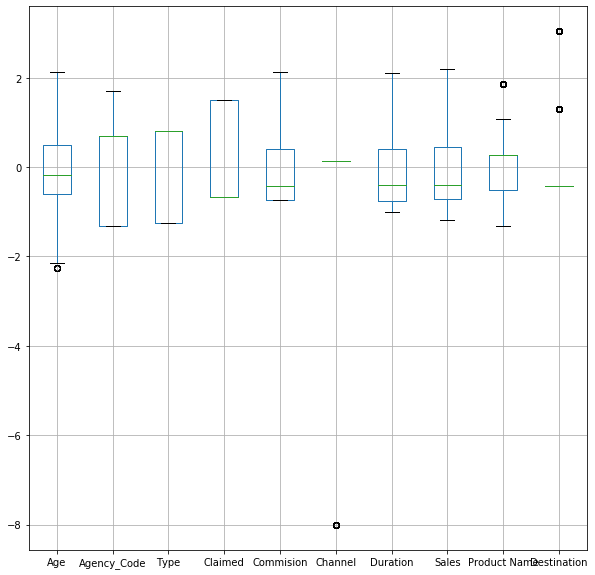

In [155]:
ins_scale1.boxplot(figsize=(10,10))

In [156]:
#Building ANN model using GridSearchCV
param_grid = {
    'hidden_layer_sizes': [100,200,300,500],
    'max_iter': [5000,2500,7000,6000],
    'solver': ['sgd','adam'],
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=0)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [157]:
grid_search.fit(a_train, b_train)
grid_search.best_params_

{'hidden_layer_sizes': 300, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}

In [158]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=300, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.01, validation_fraction=0.1, verbose=False,
              warm_start=False)

## Predicting the Training and Testing data

In [159]:
btrain_predict = best_grid.predict(a_train)
btest_predict = best_grid.predict(a_test)

## NN Model Performance Evaluation on Training data

In [160]:
confusion_matrix(b_train,btrain_predict)

array([[1331,  133],
       [ 338,  298]], dtype=int64)

In [161]:
nn_train_acc_1=best_grid.score(a_train,train_labels) 
nn_train_acc_1

0.7757142857142857

In [162]:
print(classification_report(train_labels,btrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1464
           1       0.69      0.47      0.56       636

    accuracy                           0.78      2100
   macro avg       0.74      0.69      0.70      2100
weighted avg       0.77      0.78      0.76      2100



In [163]:
#ANN Analysis of train data after treating outliers
nn_metrics_1=classification_report(train_labels, btrain_predict,output_dict=True)
df1=pd.DataFrame(nn_metrics_1).transpose()
nn_train_precision_1=round(df1.loc["1"][0],2)
nn_train_recall_1=round(df1.loc["1"][1],2)
nn_train_f1_1=round(df1.loc["1"][2],2)
print ('nn_train_precision_ao ',nn_train_precision_1)
print ('nn_train_recall_ao ',nn_train_recall_1)
print ('nn_train_f1_ao ',nn_train_f1_1)

nn_train_precision_ao  0.69
nn_train_recall_ao  0.47
nn_train_f1_ao  0.56


Area under Curve is 0.6888532322919888


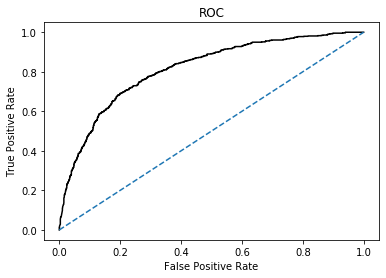

In [164]:
#ANN AUC Analysis of train data after treating outliers
nn_train_fpr1, nn_train_tpr1,_=roc_curve(train_labels,best_grid.predict_proba(a_train)[:,1])
plt.plot(nn_train_fpr1,nn_train_tpr1,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc1=roc_auc_score(train_labels,best_grid.predict(a_train))
print('Area under Curve is', nn_train_auc1)

## NN Model Performance Evaluation on Test data

In [165]:
confusion_matrix(b_test,btest_predict)

array([[564,  48],
       [158, 130]], dtype=int64)

In [166]:
nn_test_acc_1=best_grid.score(a_test,test_labels)
nn_test_acc_1

0.7711111111111111

In [167]:
print(classification_report(test_labels,btest_predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       612
           1       0.73      0.45      0.56       288

    accuracy                           0.77       900
   macro avg       0.76      0.69      0.70       900
weighted avg       0.76      0.77      0.75       900



In [168]:
#ANN Analysis of test data after treating outliers
nn_metrics_1=classification_report(test_labels, btest_predict,output_dict=True)
df1=pd.DataFrame(nn_metrics_1).transpose()
nn_test_precision_1=round(df1.loc["1"][0],2)
nn_test_recall_1=round(df1.loc["1"][1],2)
nn_test_f1_1=round(df1.loc["1"][2],2)
print ('nn_test_precision_ao ',nn_test_precision_1)
print ('nn_test_recall_ao ',nn_test_recall_1)
print ('nn_test_f1_ao ',nn_test_f1_1)

nn_test_precision_ao  0.73
nn_test_recall_ao  0.45
nn_test_f1_ao  0.56


Area under Curve is 0.6864787581699346


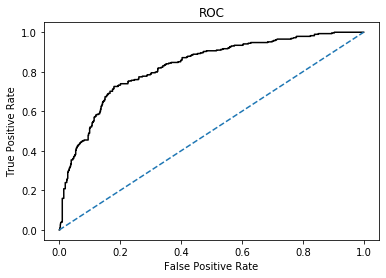

In [169]:
#ANN AUC Analysis of test data after treating outliers
nn_test_fpr1, nn_test_tpr1,_=roc_curve(test_labels,best_grid.predict_proba(a_test)[:,1])
plt.plot(nn_test_fpr1,nn_test_tpr1,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc1=roc_auc_score(test_labels,best_grid.predict(a_test))
print('Area under Curve is', nn_test_auc1)

In [170]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=300, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.01, validation_fraction=0.1, verbose=False,
              warm_start=False)>

# Neural Network Conclusion

Before Treating Outliers:

<b>Train Data:</b>  
    AUC: 66%        
    Accuracy: 77%        
    Sensitivity: 38%     
    Precision: 71%        
    f1-Score: 50%       
            
<b>Test Data:</b>      
    AUC: 65%      
    Accuracy: 76%      
    Sensitivity: 35%    
    Precision: 76%       
    f1-Score: 48%     
  
 After Treating Outliers:

<b>Train Data:</b>  
    AUC: 69%        
    Accuracy: 78%        
    Sensitivity: 47%     
    Precision: 69%        
    f1-Score: 56%       
            
<b>Test Data:</b>      
    AUC: 69%      
    Accuracy: 77%      
    Sensitivity: 45%    
    Precision: 73%       
    f1-Score: 56% 

Training and Test set results are better after treating outliers in ANN model. With the overall measures high, the model is a good model.

# Final Conclusion

## Comparison of the performance metrics from the 3 models after treating outliers in ANN

In [171]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc_1,nn_train_auc1,nn_train_recall_1,nn_train_precision_1,nn_train_f1_1],
        'Neural Network Test':[nn_test_acc_1,nn_test_auc1,nn_test_recall_1,nn_test_precision_1,nn_test_f1_1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.79,0.81,0.80,0.78,0.77
AUC,0.82,0.81,0.76,0.75,0.69,0.69
Recall,0.64,0.61,0.63,0.59,0.47,0.45
Precision,0.66,0.69,0.72,0.74,0.69,0.73
F1 Score,0.65,0.65,0.67,0.66,0.56,0.56


## ROC Curve for the 3 models on the Training data

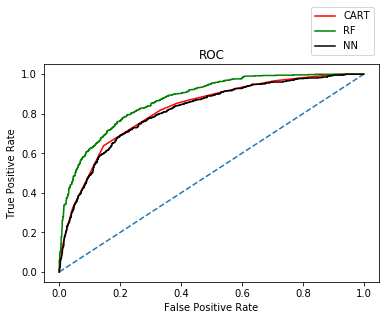

In [172]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr1,nn_train_tpr1,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC Curve for the 3 models on the Test data

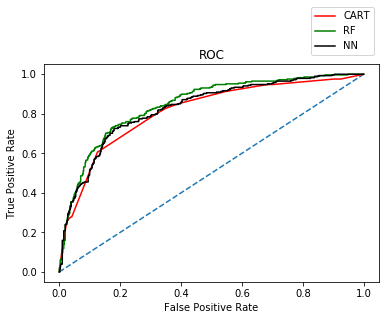

In [173]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr1,nn_test_tpr1,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Out of the 3 models, Random Forest has slightly better performance than the CART and Artificial Neural network model after treating outliers.

Agency Code is found to be the most important variable as observed from CART and Random Forest Model.